# Shapely

## Geometric objects

In [95]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon, LinearRing
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# set the default dpi
plt.rcParams['figure.dpi'] = 100

### Points

In [96]:
# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

In [97]:
point1.x, point1.y

(2.2, 4.2)

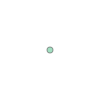

In [98]:
point1

In [99]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


In [100]:
point1.geom_type

'Point'

In [101]:
# Calculate the distance between point1 and point2
point1.distance(point2)

29.723559679150142

### Linestring

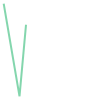

In [102]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])
line

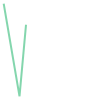

In [103]:
# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line2

In [104]:
print(line)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


In [105]:
print("Object data type:", type(line))
print("Geometry type as text:", line.geom_type)

Object data type: <class 'shapely.geometry.linestring.LineString'>
Geometry type as text: LineString


In [106]:
# Get x and y coordinates of the line
line.xy

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))

In [107]:
# Get the lenght of the line
line.length

52.46106912939557

In [108]:
# Get the centroid of the line, which is a Point
line.centroid.xy

(array('d', [6.229961354035622]), array('d', [-11.892411157572392]))

### LinearRing

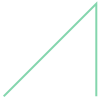

In [110]:
lring = LineString([(0, 0), (1, 1), (1, 0)])
lring

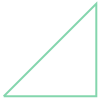

In [109]:
ring = LinearRing([(0, 0), (1, 1), (1, 0)])
ring

In [111]:
ring.xy

(array('d', [0.0, 1.0, 1.0, 0.0]), array('d', [0.0, 1.0, 0.0, 0.0]))

In [112]:
ring.area

0.0

In [114]:
lring.length

2.414213562373095

In [113]:
ring.length

3.414213562373095

### Polygon

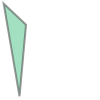

In [115]:
# Unlike linestring, polygon object only accepts a sequence of coordinates as input.
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
poly

In [116]:
# Get the centroid of the polygon
poly.centroid.xy

(array('d', [6.22]), array('d', [-7.785333333333334]))

In [117]:
# Get the area of the polygon
poly.area

86.789

In [118]:
# The total length of all the edges
poly.length

62.16395199996553

In [119]:
# Get the bounds of the Polygon (i.e. bounding box)
poly.bounds

(2.2, -25.1, 9.26, 4.2)

In [121]:
# Get the exterior of the Polygon, which will be linestring
poly.exterior.geom_type

'LinearRing'

In [122]:
# if you want to check the coordinates of the vertice, you can only check through its exterior
poly.exterior.xy

(array('d', [2.2, 7.2, 9.26, 2.2]), array('d', [4.2, -25.1, -2.456, 4.2]))

## Linear referencing

In [123]:
Omaha =   Point(-95.943505, 41.253308)
Lincoln = Point(-96.717118, 40.861633)
Mahoney = Point(-96.314588, 41.022143)

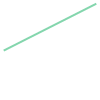

In [124]:
# create a straight line connecting Lincoln and Omaha
I80 = LineString([Lincoln, Omaha])
I80

In [125]:
# check the distance of Mahoney to Lincoln on this straight line
distance = I80.project(Mahoney)
distance

0.4316275278637525

In [126]:
# get the coordinates of Mahoney if we know its distance to Lincoln
pt = I80.interpolate(distance)
pt.xy

(array('d', [-96.33203283765646]), array('d', [41.05659899845259]))

## Relationship

In [128]:
line1 = LineString([(0, 0), (1, 1)])
line2 = LineString([(0.5, 0.5), (0.5, 1)])
line1.intersects(line2)

True

# GeoPandas

## Managing projections

In [129]:
# changing CRS
ne = gpd.read_file('https://public.opendatasoft.com/explore/dataset/us-county-boundaries/download/?format=geojson&refine.stusab=NE&timezone=America/Chicago&lang=en')
ne.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [130]:
# change it to Nebraska State Plane: https://spatialreference.org/ref/epsg/26822/
ne_state_plane = ne.to_crs("EPSG:26822")
ne_state_plane.crs

<Projected CRS: EPSG:26822>
Name: NAD83 / Nebraska (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - Nebraska
- bounds: (-104.06, 39.99, -95.3, 43.01)
Coordinate Operation:
- name: SPCS83 Nebraska zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

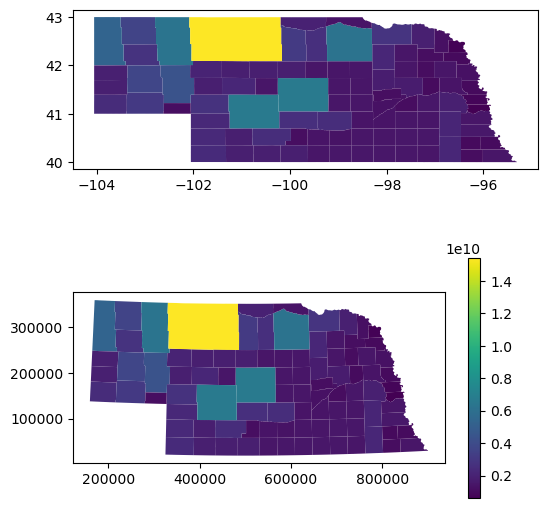

In [132]:
fig, ax = plt.subplots(2, 1, figsize=(6, 7))
ne.plot(ax=ax[0], column='aland')
ne_state_plane.plot(ax=ax[1], column='aland', legend=True)

## Constructive Methods

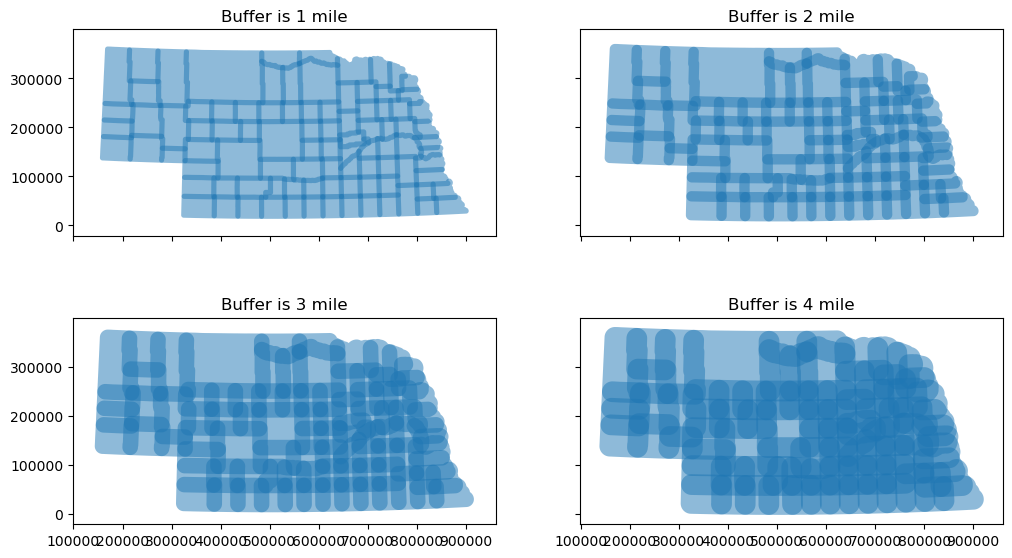

In [133]:
# buffer
fig, axs = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey=True)
axs = axs.flatten()
for i in range(4):
    ax=axs[i]
    ne_state_plane.buffer(5280 * (i + 1) * 1).plot(ax=ax, alpha=0.5)
    ax.set_title(f'Buffer is {i+1} mile')

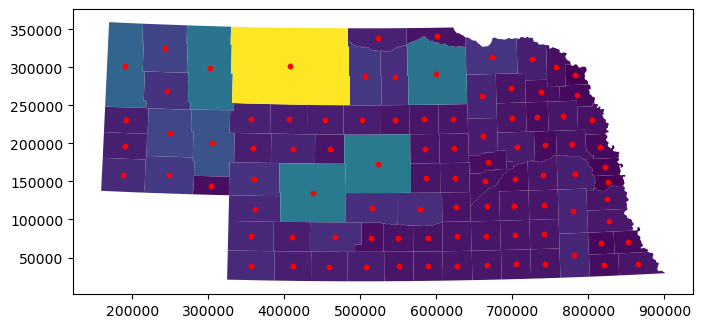

In [134]:
# centroid
fig, ax = plt.subplots(figsize=(8, 5))
ne_state_plane.plot(ax=ax, column='aland')
ne_state_plane.centroid.plot(ax=ax, color='r', markersize=10)

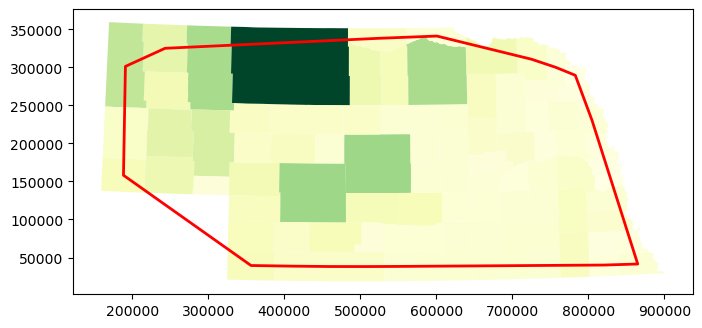

In [135]:
# convex_hull
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
ne_state_plane.plot(ax=ax, column='aland', cmap='YlGn')
convex_hull = gpd.GeoDataFrame(geometry=ne_state_plane.centroid)
convex_hull['state'] = 'NE'
convex_hull.dissolve('state').convex_hull.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='r')


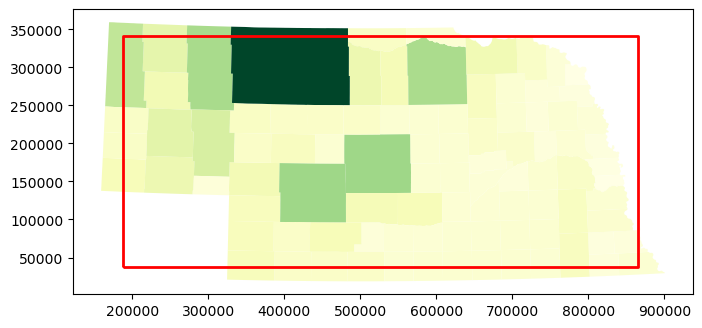

In [136]:
# GeoSeries.envelope
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
ne_state_plane.plot(ax=ax, column='aland', cmap='YlGn')
envelope = gpd.GeoDataFrame(geometry=ne_state_plane.centroid)
envelope['state'] = 'NE'
envelope.dissolve('state').envelope.plot(ax=ax, facecolor='none', linewidth=2, edgecolor='r')


### plot NASS data -- state-level dryland corn acres

In [137]:
# read NASS data
import nass
api = nass.NassApi('AED11AD5-993E-3B84-8054-CA9BC02D181B')
api.param_values('source_desc')
q = api.query()
q.filter('short_desc', 'CORN, GRAIN, NON-IRRIGATED - ACRES HARVESTED').filter('agg_level_desc', 'STATE')
print(q.count())
df = pd.DataFrame(q.execute())
df.head()

427


,source_desc,year,group_desc,class_desc,asd_desc,county_ansi,location_desc,reference_period_desc,country_name,sector_desc,...,util_practice_desc,unit_desc,asd_code,state_fips_code,state_ansi,statisticcat_desc,state_name,CV (%),county_name,freq_desc
0,CENSUS,2013,FIELD CROPS,ALL CLASSES,,,ALABAMA,YEAR,UNITED STATES,CROPS,...,GRAIN,ACRES,,01,01,AREA HARVESTED,ALABAMA,,,ANNUAL
1,CENSUS,2013,FIELD CROPS,ALL CLASSES,,,ARKANSAS,YEAR,UNITED STATES,CROPS,...,GRAIN,ACRES,,05,05,AREA HARVESTED,ARKANSAS,,,ANNUAL
2,CENSUS,2013,FIELD CROPS,ALL CLASSES,,,COLORADO,YEAR,UNITED STATES,CROPS,...,GRAIN,ACRES,,08,08,AREA HARVESTED,COLORADO,,,ANNUAL
3,CENSUS,2013,FIELD CROPS,ALL CLASSES,,,CONNECTICUT,YEAR,UNITED STATES,CROPS,...,GRAIN,ACRES,,09,09,AREA HARVESTED,CONNECTICUT,,,ANNUAL
4,CENSUS,2013,FIELD CROPS,ALL CLASSES,,,DELAWARE,YEAR,UNITED STATES,CROPS,...,GRAIN,ACRES,,10,10,AREA HARVESTED,DELAWARE,,,ANNUAL


In [141]:
df.Value

0       48,205
1       11,215
2      115,785
3          942
4       53,257
        ...   
422      1,630
423      1,710
424      5,350
425      5,850
426      8,350
Name: Value, Length: 427, dtype: object

In [142]:
# read shapefile county
shp_state = gpd.read_file('/vsizip/tl_2008_us_state.zip')
shp_state.index = shp_state.STATEFP
shp_state.sort_index(inplace=True)
shp_state

,STATEFP,STATENS,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,geometry
STATEFP,,,,,,,,
01,01,01779775,AL,Alabama,00,G4000,A,"MULTIPOLYGON (((-84.13102 30.67834, -84.12490 ..."
02,02,01785533,AK,Alaska,00,G4000,A,"POLYGON ((-77.52696 39.13569, -77.52695 39.135..."
04,04,01779777,AZ,Arizona,00,G4000,A,"POLYGON ((-80.51899 40.65638, -80.51899 40.658..."
05,05,00068085,AR,Arkansas,00,G4000,A,"POLYGON ((-92.67039 45.38813, -92.67056 45.387..."
06,06,01779778,CA,California,00,G4000,A,"POLYGON ((-115.67454 49.00079, -115.67445 49.0..."
08,08,01779779,CO,Colorado,00,G4000,A,"POLYGON ((-94.61792 36.49941, -94.61783 36.499..."
09,09,01779780,CT,Connecticut,00,G4000,A,"POLYGON ((-74.97434 41.09446, -74.97530 41.094..."
10,10,01779781,DE,Delaware,00,G4000,A,"POLYGON ((-75.75071 39.18154, -75.75076 39.182..."
11,11,01702382,DC,District of Columbia,00,G4000,A,"POLYGON ((-77.11644 38.92957, -77.11647 38.929..."


In [144]:
# change the value to numeric
df.Value = pd.to_numeric(df.Value.apply(lambda x: x.replace(',', '')), errors='coerce')
df = df.loc[:, ['state_fips_code', 'Value']].groupby('state_fips_code').Value.mean()
df.head()

state_fips_code
01     48205.000000
05     11215.000000
08    155610.263158
09       942.000000
10     86607.125000
Name: Value, dtype: float64

In [145]:
shp_state['corn_acre'] = df
corn_acre = shp_state[['corn_acre','geometry']]
corn_acre.head(5)

,corn_acre,geometry
STATEFP,,
01,48205.0,"MULTIPOLYGON (((-84.13102 30.67834, -84.12490 ..."
02,NaN,"POLYGON ((-77.52696 39.13569, -77.52695 39.135..."
04,NaN,"POLYGON ((-80.51899 40.65638, -80.51899 40.658..."
05,11215.0,"POLYGON ((-92.67039 45.38813, -92.67056 45.387..."
06,NaN,"POLYGON ((-115.67454 49.00079, -115.67445 49.0..."


Text(0.5, 1.0, 'Harvested acres of non-irrigated corn')

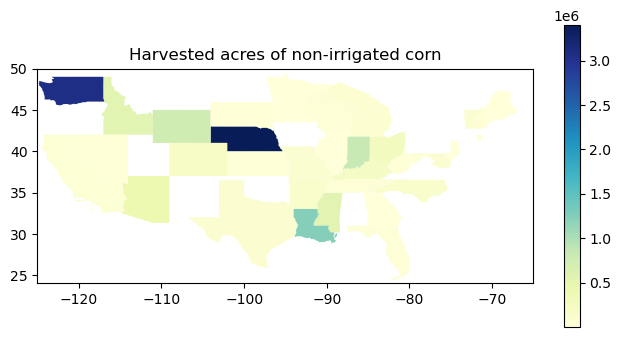

In [147]:
# make plots: drop those without data
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
corn_acre.dropna().plot(ax=ax, column='corn_acre', cmap='YlGnBu', legend=True) # plot based on the column corn_acre
ax.set_xlim(-125, -65)
ax.set_ylim(24, 50)
ax.set_title('Harvested acres of non-irrigated corn')

### plot model error

In [148]:
errors = pd.read_csv('PSAsim_errMap.csv')
errors.head(5)

,x,y,lpmt_err,psa_err
0,2.396292e+06,881281.545100,11.515888,8.147591
1,2.409148e+06,884029.308987,0.479978,-0.399853
2,2.427902e+06,890323.640418,2.997727,3.386410
3,2.446126e+06,894286.053552,5.496313,6.923996
4,2.402447e+06,895657.072124,3.685797,2.137156


In [149]:
# read shapefiles
shpPSA = gpd.read_file('zip://LE_GW_Model_Pilot_Scale_Area.zip') 
seg = gpd.read_file('zip://PSA_Sfr_Segments_SinglePart.zip')
shpCounty = gpd.read_file('zip://County Boundaries - TIGER 2010.zip')

(853849.0, 972849.0)

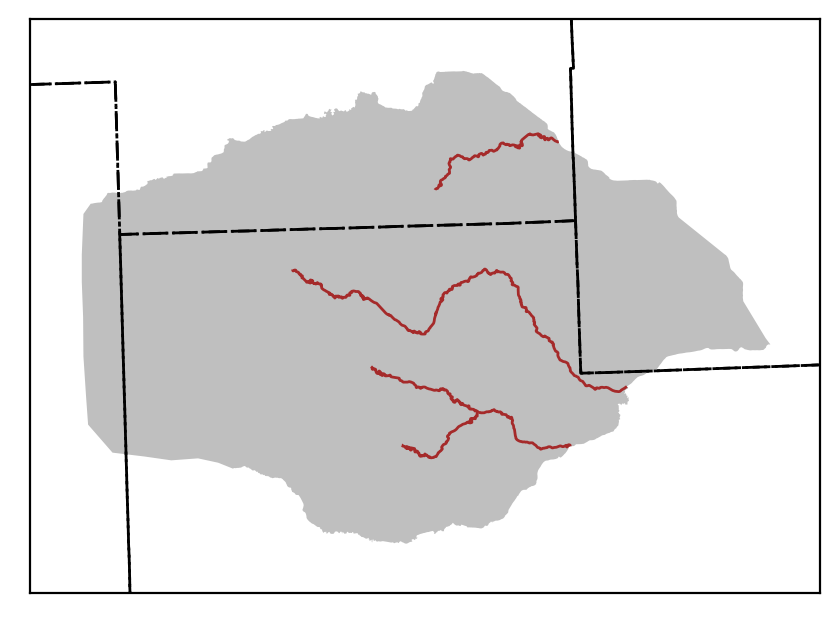

In [150]:
# plot shapefiles
    
fig, ax = plt.subplots(figsize=(6, 3.8), dpi=200)

shpPSA.plot(ax=ax, color='grey', alpha=0.5)
seg.plot(ax=ax, color='brown', linewidth=1)    
shpCounty.plot(ax=ax, facecolor='none', edgecolor='k', linestyle='-.')   


ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xlim(2343024-10000, 2486904+10000)
ax.set_ylim(863849-10000, 962849+10000)

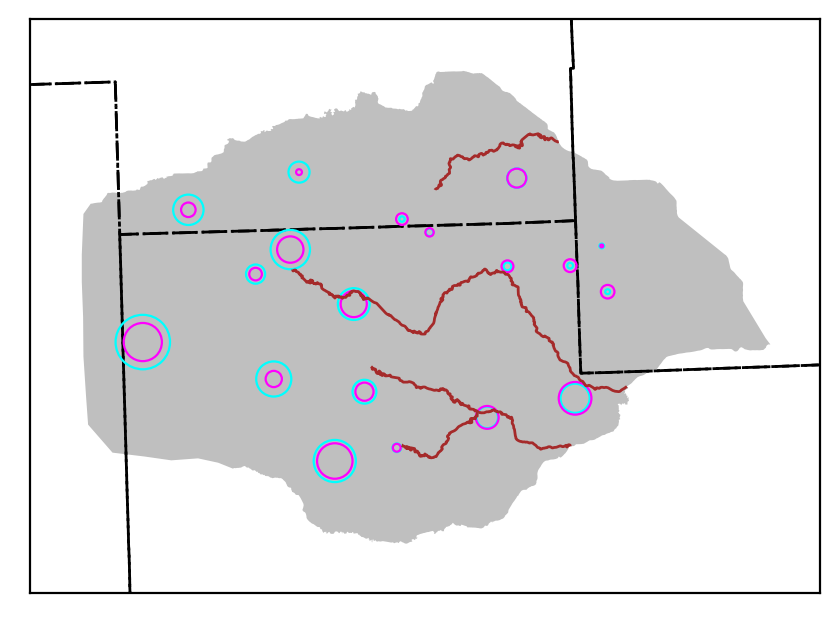

In [151]:
# add scatter plot representng errors
errScale = 20
ax.scatter(errors.x, errors.y, s=errors.lpmt_err.abs()*errScale, marker='o', c='none', edgecolors='cyan', linewidth=0.8)
ax.scatter(errors.x, errors.y, s=errors.psa_err.abs() *errScale, marker='o', c='none', edgecolors='magenta', linewidth=0.8)
fig

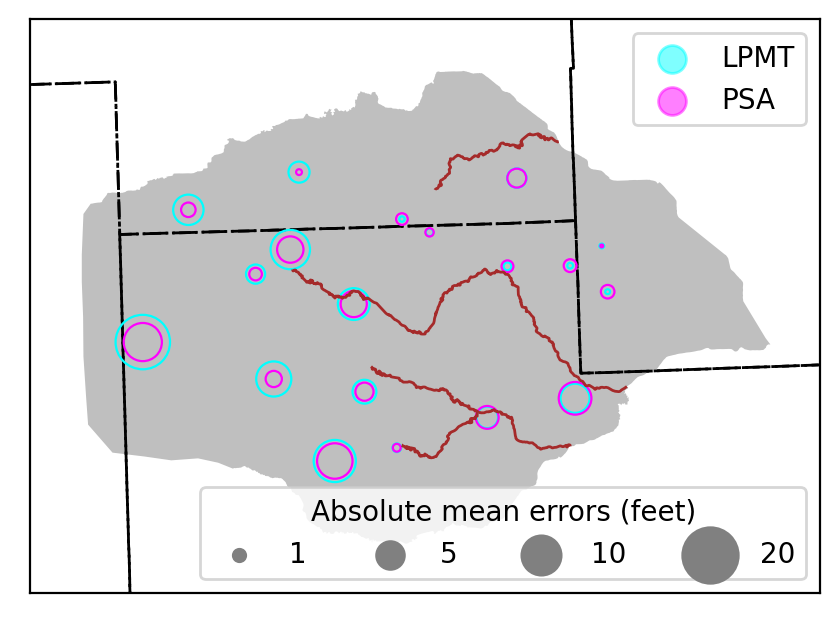

In [152]:
# add the legend
error_limit = [1, 5, 10, 20]
labels = [str(e) for e in error_limit]
legs = [ax.scatter([],[],s=e*errScale,c='grey') for e in error_limit]
leg_err = ax.legend(legs, labels, loc='lower right', title='Absolute mean errors (feet)', ncol=4, frameon=True, fontsize=10)

ax.legend([ax.scatter([],[],s=5*errScale,c=c, alpha=0.5) for c in ['cyan', 'magenta']], ['LPMT', 'PSA'], loc='upper right', )
ax.add_artist(leg_err)
fig

## Overlay and Spatial Joins

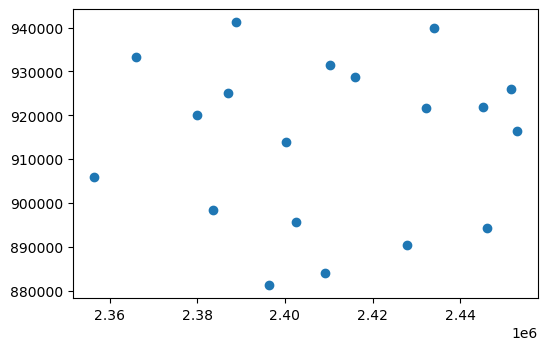

In [153]:
# create a geodataframe based on error df
shpError = gpd.GeoDataFrame(errors, geometry=[Point(r.x, r.y) for i, r in errors.iterrows()])
shpError.plot()

In [154]:
# I want to check what county they are within
shpErrorCounty = gpd.overlay(shpError, shpCounty, how='intersection')
shpErrorCounty.head(5)

C:\Miniconda3\lib\site-packages\geopandas\base.py:48: UserWarning: GeoSeries crs mismatch: None and epsg:26852
  warn("GeoSeries crs mismatch: {0} and {1}".format(this.crs, other.crs))


,x,y,lpmt_err,psa_err,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,...,CTYNAME_LO,COUNTY_NAM,CENSUS00,CENSUS10,Object2,IntFIPS,ORIG_FID,Shape_area,Shape_len,geometry
0,2.396292e+06,881281.545100,11.515888,8.147591,31,179,00835911,31179,Wayne,Wayne County,...,wayne,WAYNE,9851.0,9595.0,23,179,23,1.235286e+10,485398.392146,POINT (2396292.258 881281.545)
1,2.409148e+06,884029.308987,0.479978,-0.399853,31,179,00835911,31179,Wayne,Wayne County,...,wayne,WAYNE,9851.0,9595.0,23,179,23,1.235286e+10,485398.392146,POINT (2409148.074 884029.309)
2,2.427902e+06,890323.640418,2.997727,3.386410,31,179,00835911,31179,Wayne,Wayne County,...,wayne,WAYNE,9851.0,9595.0,23,179,23,1.235286e+10,485398.392146,POINT (2427902.319 890323.640)
3,2.446126e+06,894286.053552,5.496313,6.923996,31,179,00835911,31179,Wayne,Wayne County,...,wayne,WAYNE,9851.0,9595.0,23,179,23,1.235286e+10,485398.392146,POINT (2446125.944 894286.054)
4,2.402447e+06,895657.072124,3.685797,2.137156,31,179,00835911,31179,Wayne,Wayne County,...,wayne,WAYNE,9851.0,9595.0,23,179,23,1.235286e+10,485398.392146,POINT (2402447.218 895657.072)


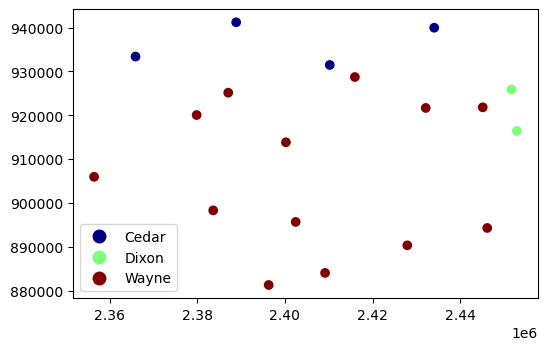

In [156]:
shpErrorCounty.plot(column='NAME10', cmap='jet', legend=True)

In [157]:
# spatial join can do the same thing
shpErrorJoin = gpd.sjoin(shpError, shpCounty)
shpErrorJoin.head(5)


C:\Miniconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != epsg:26852)
  "(%s != %s)" % (left_df.crs, right_df.crs)


,x,y,lpmt_err,psa_err,geometry,index_right,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,...,INTPTLON10,CTYNAME_LO,COUNTY_NAM,CENSUS00,CENSUS10,Object2,IntFIPS,ORIG_FID,Shape_area,Shape_len
0,2.396292e+06,881281.545100,11.515888,8.147591,POINT (2396292.258 881281.545),76,31,179,00835911,31179,...,-097.1262433,wayne,WAYNE,9851.0,9595.0,23,179,23,1.235286e+10,485398.392146
1,2.409148e+06,884029.308987,0.479978,-0.399853,POINT (2409148.074 884029.309),76,31,179,00835911,31179,...,-097.1262433,wayne,WAYNE,9851.0,9595.0,23,179,23,1.235286e+10,485398.392146
2,2.427902e+06,890323.640418,2.997727,3.386410,POINT (2427902.319 890323.640),76,31,179,00835911,31179,...,-097.1262433,wayne,WAYNE,9851.0,9595.0,23,179,23,1.235286e+10,485398.392146
3,2.446126e+06,894286.053552,5.496313,6.923996,POINT (2446125.944 894286.054),76,31,179,00835911,31179,...,-097.1262433,wayne,WAYNE,9851.0,9595.0,23,179,23,1.235286e+10,485398.392146
4,2.402447e+06,895657.072124,3.685797,2.137156,POINT (2402447.218 895657.072),76,31,179,00835911,31179,...,-097.1262433,wayne,WAYNE,9851.0,9595.0,23,179,23,1.235286e+10,485398.392146


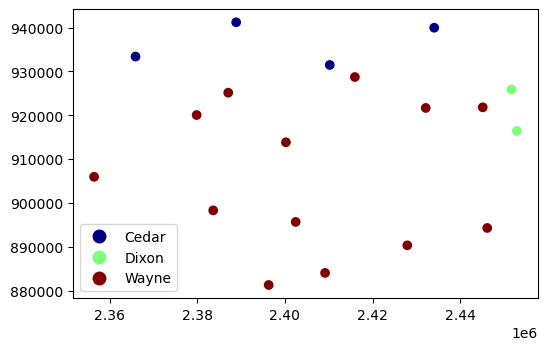

In [158]:
shpErrorJoin.plot(column='NAME10', cmap='jet', legend=True)